In [ ]:
# if you want the new models you need to update pytorch and torchvision

In [1]:
import numpy as np
import pandas as pd

import torch
import torchvision
from torchvision import datasets, models, transforms

import matplotlib.pyplot as plt

import pickle
import time
import os
import copy
import sys


In [2]:
print(sys.version)
print(torch.__version__)
print(torchvision.__version__)


3.8.13 (default, Mar 28 2022, 11:38:47) 
[GCC 7.5.0]
1.12.1
0.13.1


In [ ]:
# from __future__ import print_function, division

# import torch.nn as nn
# import torch.optim as optim
# from torch.optim import lr_scheduler
# import torch.backends.cudnn as cudnn
# 
# import matplotlib.pyplot as plt

# cudnn.benchmark = True
# plt.ion() 

In [3]:
# data agumentation

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [4]:
# Load data - a lot needs to change here since you have a score for each image and not a class (given by dir)

data_dir = '/home/simon/Documents/Bodies/data/RA/Tutorial/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

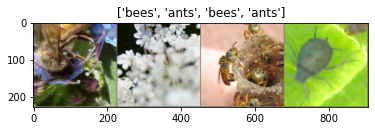

In [5]:
# Viz some images

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [7]:
# load the model

# just for test
from torchvision.models import vgg16_bn # bn is simply the version with batch normalization

# to use. All have relative few parameters. One is an transformer (swin) the rest is cnns
from torchvision.models import convnext_tiny, efficientnet_v2_s, regnet_x_8gf, swin_t, wide_resnet50_2
